In [1]:
## Import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Import data file and preview

frogs=pd.read_csv("frogs.csv")
frogs

,#OTU ID,Sample_number,Vaccinated,Concentration,Exp,Duration,conc_dur,observed_otus,shannon,faith_pd,...,Total Reads,Unnamed: 409,# Inhib reads,Proportion Inhib reads,Unnamed: 412,# New Inhib reads,New Proportion inhib,Unnamed: 415,# New + Old inhib reads,New + Old proportion inhib
0,Property,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M01,1.0,nonvac,control,0.0,5.0,control_5,13.0,0.922008,2.028796,...,900.0,NaN,13.0,0.014444,NaN,0.0,0.000000,NaN,13.0,0.014444
2,M02,2.0,nonvac,control,0.0,5.0,control_5,30.0,2.956480,4.638258,...,900.0,NaN,480.0,0.533333,NaN,0.0,0.000000,NaN,480.0,0.533333
3,M03,3.0,nonvac,control,0.0,5.0,control_5,25.0,1.359415,4.460690,...,900.0,NaN,213.0,0.236667,NaN,4.0,0.004444,NaN,217.0,0.241111
4,M04,4.0,nonvac,control,0.0,5.0,control_5,40.0,3.395350,3.822525,...,900.0,NaN,146.0,0.162222,NaN,3.0,0.003333,NaN,149.0,0.165556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,M95,95.0,vac,10^6,6.0,3.0,6_3,13.0,1.036189,2.650862,...,900.0,NaN,9.0,0.010000,NaN,0.0,0.000000,NaN,9.0,0.010000
82,M96,96.0,vac,10^6,6.0,5.0,6_5,34.0,2.312653,5.407437,...,900.0,NaN,635.0,0.705556,NaN,0.0,0.000000,NaN,635.0,0.705556
83,M97,97.0,vac,10^6,6.0,5.0,6_5,17.0,3.098015,2.126662,...,900.0,NaN,50.0,0.055556,NaN,0.0,0.000000,NaN,50.0,0.055556
84,M98,98.0,vac,10^6,6.0,5.0,6_5,48.0,3.565162,6.214334,...,900.0,NaN,251.0,0.278889,NaN,0.0,0.000000,NaN,251.0,0.278889


In [3]:
## Vaccinated: if the sample is within the control or treatment groups
## Concentration: the concentration of the cell-free metabolite based prophylactic (zoospores/mL)
## Exp: the order of magnitude (exponents only) of the concentration treatment
## Duration: the duration of exposure (weeks) of the cell-free metabolite based prophylactic
## conc_dur: combination of the 2 treatment groups, concentration and duration
## observed_otus: count of the total number of operational taxonomic units per sample
## shannon: Shannon diversity index, a measure of diversity between samples
## faith_pd: Faith Phylogenetic diversity, a measure of diversity based on phylogeny 
## pielou_e: pielou's evenness index, a measure of diversity considering evenness
## weighted_PC1 (0.359): weighted (considering relative abundance) principal component 1 from unifrac distance
## weighted_PC2 (0.181): weighted (considering relative abundance) principal component 2 from unifrac distance
## unweighted_PC1 (0.103): unweighted (presence/absence) principal component 1 from unifrac distance
## unweighted_PC2 (0.097): unweighted (presence/absence) principal component 2 from unifrac distance

## Property (row): if the OTU has known inhibitory or facilitating properties against the growth of Bd

C:\Users\Samantha Siomko\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


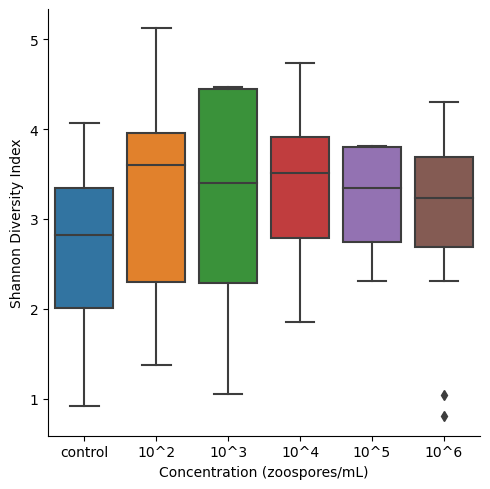

In [4]:
## Boxplot of samples separated by prophylactic concentration to compare shannon diversity of the microbiomes

sns.catplot(
    data=frogs,
    x="Concentration",
    y="shannon",
    kind="box",
).set(
    xlabel='Concentration (zoospores/mL)', 
    ylabel='Shannon Diversity Index'
)

C:\Users\Samantha Siomko\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


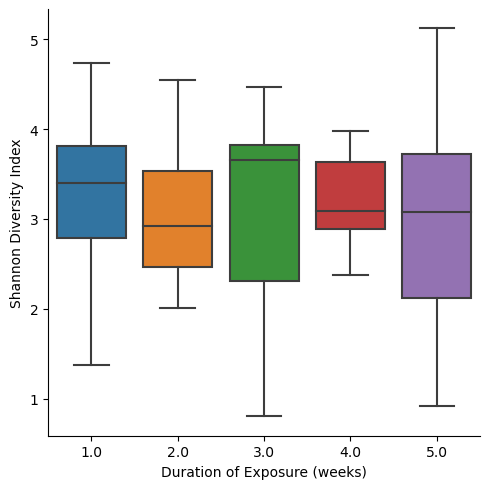

In [5]:
## Boxplot of samples separated by prophylactic duration of exposure to compare shannon diversity of the microbiomes

sns.catplot(
    data=frogs,
    x="Duration",
    y="shannon",
    kind="box",
).set(
    xlabel='Duration of Exposure (weeks)', 
    ylabel='Shannon Diversity Index'
)

C:\Users\Samantha Siomko\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


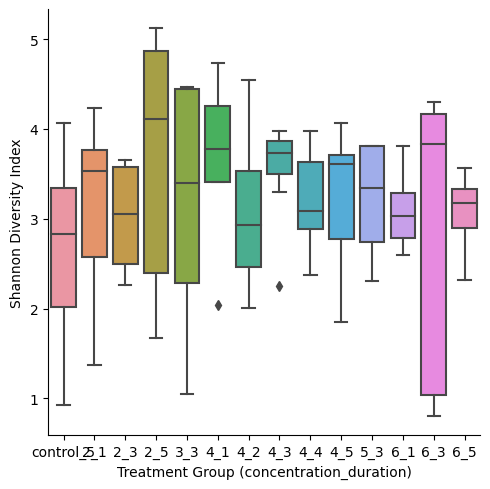

In [6]:
## Boxplot of samples separated by prophylactic duration of exposure to compare shannon diversity of the microbiomes

sns.catplot(
    data=frogs,
    x="conc_dur",
    y="shannon",
    kind="box",
).set(
    xlabel='Treatment Group (concentration_duration)', 
    ylabel='Shannon Diversity Index'
)

In [7]:
## Create an array to store the read count of inhibitory OTUs
inhib_rows = []

## Iterate over samples starting from the second row
for i in range(1, len(frogs)):
    ## Create a temporary list to store inhibitory read counts for the current iteration
    temp_list = []

    ## Iterate over columns per sample
    for col in frogs.columns:
        ## Check if the value in the first row is "Inhib" and the current value is numeric
        if frogs.at[0, col] == 'Inhib' and pd.to_numeric(frogs.at[i, col], errors='coerce') is not None:
            ## If so, add the corresponding numeric value from the current iteration to the temporary list
            temp_list.append(pd.to_numeric(frogs.at[i, col], errors='coerce'))

    ## Append the sum of the temporary list to the result_rows list
    inhib_rows.append([frogs.at[i, '#OTU ID'], sum(temp_list)])

## Create a new dataframe with the sample call number and inhibitory read sum
inhib_sum = pd.DataFrame(inhib_rows, columns=['#OTU ID', 'Sum'])

## Set the '#OTU ID' column as the index
inhib_sum.set_index('#OTU ID', inplace=True)

## Display the results
print(inhib_sum)

         Sum
#OTU ID     
M01       13
M02      480
M03      213
M04      146
M05      583
...      ...
M95        9
M96      635
M97       50
M98      251
M101      61

[85 rows x 1 columns]


In [9]:
## Create 4 groups based on the sums of inhibitory read counts per sample (less than 100, 100-300, 300-600, and greater than 600)
def categorize_sum(sum_value):
    if sum_value < 100:
        return 'Less than 100'
    elif 100 <= sum_value <= 300:
        return '100-300'
    elif 100 <= sum_value <= 600:
        return '300-600'
    else:
        return 'Greater than 600'

## Append the dataframe to include these new groups as a new column
inhib_sum['SumGroup'] = inhib_sum['Sum'].apply(categorize_sum)

In [10]:
## Add other metrics and treatment information to the sum dataframe
inhibitory = pd.merge(inhib_sum,frogs[['#OTU ID', 'Concentration', 'Duration', 'shannon', 'faith_pd', 'pielou_e', 'weighted_PC1 (0.359)', 'unweighted_PC1 (0.103)']],on='#OTU ID',how='left')

## Change the strings in the Concentration column to continuous 
rename = {'control': 0, '10^2': 10**2,'10^3': 10**3, '10^4': 10**4, '10^5': 10**5, '10^6': 10**6}

## Replace the renamed Concentration variables to the 
inhibitory['Concentration'] = inhibitory['Concentration'].replace(rename)
inhibitory

,#OTU ID,Sum,SumGroup,Concentration,Duration,shannon,faith_pd,pielou_e,weighted_PC1 (0.359),unweighted_PC1 (0.103)
0,M01,13,Less than 100,0,5.0,0.922008,2.028796,0.249162,-0.201664,-0.214740
1,M02,480,300-600,0,5.0,2.956480,4.638258,0.602516,-0.116344,0.020364
2,M03,213,100-300,0,5.0,1.359415,4.460690,0.292734,0.329520,-0.101039
3,M04,146,100-300,0,5.0,3.395350,3.822525,0.637992,0.062683,-0.306535
4,M05,583,300-600,0,5.0,2.825279,6.371519,0.527345,-0.108476,0.093195
...,...,...,...,...,...,...,...,...,...,...
80,M95,9,Less than 100,1000000,3.0,1.036189,2.650862,0.280018,0.435809,-0.361925
81,M96,635,Greater than 600,1000000,5.0,2.312653,5.407437,0.454579,-0.075689,-0.084516
82,M97,50,Less than 100,1000000,5.0,3.098015,2.126662,0.757931,-0.040857,-0.022276
83,M98,251,100-300,1000000,5.0,3.565162,6.214334,0.638350,0.035340,0.066175


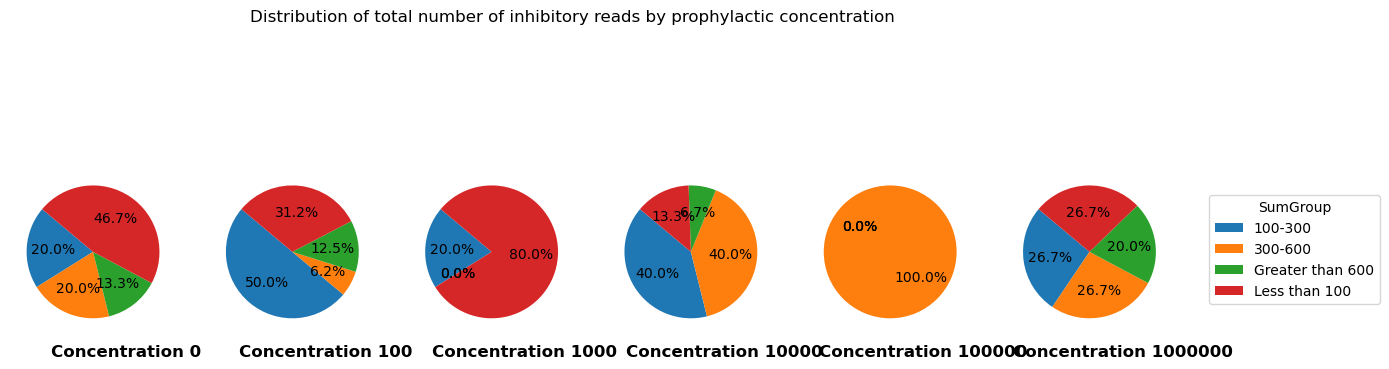

In [11]:
## Create a pie chart to show the distribution of inhibitory read counts

group_counts = inhibitory.groupby(['Concentration', 'SumGroup']).size().unstack(fill_value=0)

# Plot separate pie charts for each treatment
fig, axes = plt.subplots(1, len(inhibitory['Concentration'].unique()), figsize=(15, 5))

for i, treatment in enumerate(inhibitory['Concentration'].unique()):
    ax = axes[i]
    treatment_data = group_counts.loc[treatment]
    wedges, texts, autotexts = ax.pie(treatment_data, autopct='%1.1f%%', startangle=140, labels=None)
    
    # Add treatment label
    ax.text(0.5, -1.5, f'Concentration {treatment}', ha='center', va='center', fontsize=12, fontweight='bold')
    
# Add a common legend outside the subplots
fig.legend(wedges, group_counts.columns, title='SumGroup', loc='center left', bbox_to_anchor=(0.92, 0.5))

plt.suptitle('Distribution of total number of inhibitory reads by prophylactic concentration')
plt.show()

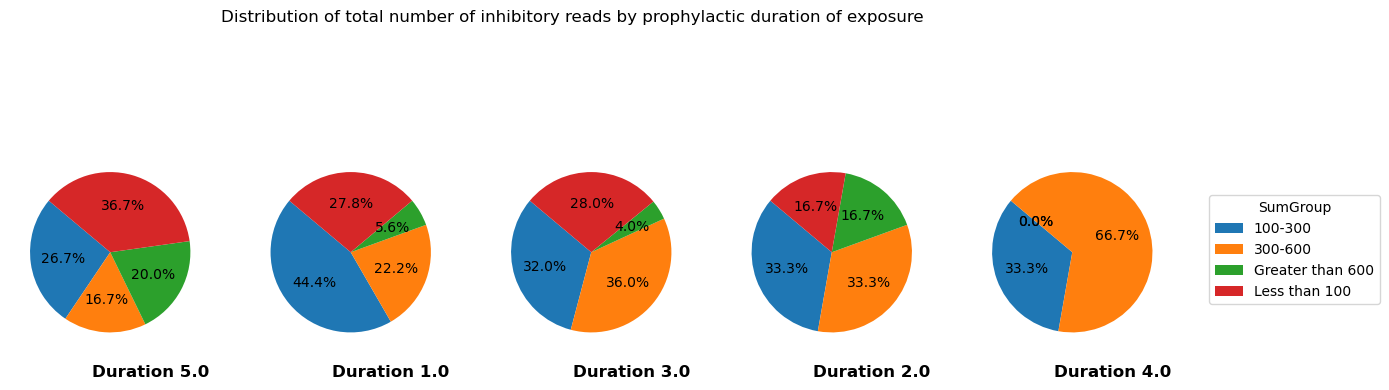

In [12]:
## Create a pie chart to show the distribution of inhibitory read counts

group_counts = inhibitory.groupby(['Duration', 'SumGroup']).size().unstack(fill_value=0)

# Plot separate pie charts for each treatment
fig, axes = plt.subplots(1, len(inhibitory['Duration'].unique()), figsize=(15, 5))

for i, treatment in enumerate(inhibitory['Duration'].unique()):
    ax = axes[i]
    treatment_data = group_counts.loc[treatment]
    wedges, texts, autotexts = ax.pie(treatment_data, autopct='%1.1f%%', startangle=140, labels=None)
    
    # Add treatment label
    ax.text(0.5, -1.5, f'Duration {treatment}', ha='center', va='center', fontsize=12, fontweight='bold')
    
# Add a common legend outside the subplots
fig.legend(wedges, group_counts.columns, title='SumGroup', loc='center left', bbox_to_anchor=(0.92, 0.5))

plt.suptitle('Distribution of total number of inhibitory reads by prophylactic duration of exposure')
plt.show()

Text(0.5, 1.0, 'Strength of influence of treatment type on the total inhibitory read count')

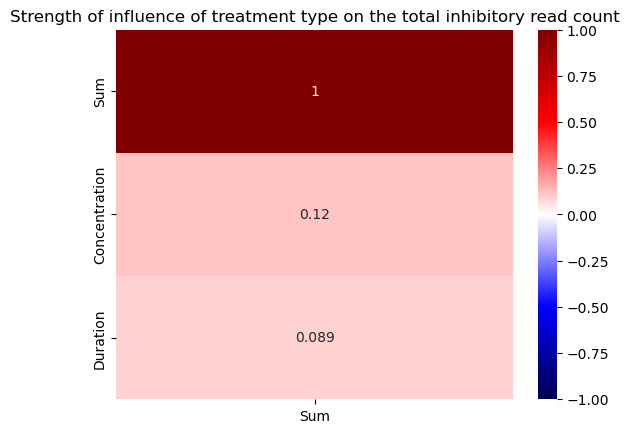

In [13]:
## Create a dataframe without the sample ID names or diversity metrics
heatmap = inhibitory.drop(['#OTU ID', 'shannon', 'faith_pd', 'pielou_e', 'weighted_PC1 (0.359)', 'unweighted_PC1 (0.103)', 'SumGroup'], axis = 'columns')

## Create a heatmap of the treatment variables that influence the sum of total inhibitory read counts
## Positive values indicate a positive influence of that factor on sum of total inhibitory read counts, and negative values indicate an inverse association
sns.heatmap(heatmap.corr()[['Sum']].sort_values(by='Sum', ascending=False), vmin=-1, vmax=1, annot=True, cmap='seismic')

## Change the plot title
plt.title('Strength of influence of treatment type on the total inhibitory read count')

Text(0.5, 1.0, 'Strength of influence of prophylactic concentration on diversity metrics')

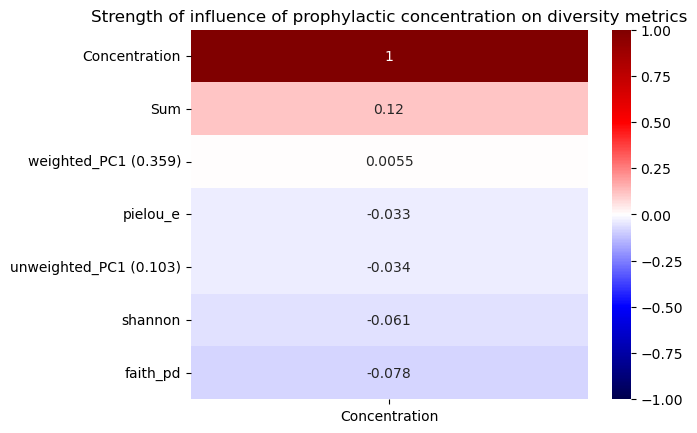

In [14]:
## Create a dataframe without the sample ID names
heatmap = inhibitory.drop(['#OTU ID', 'Duration', 'SumGroup'], axis = 'columns')

## Create a heatmap of the strength of influence that concentration has on diversity metrics
## Positive values indicate a positive influence, and negative values indicate an inverse association
sns.heatmap(heatmap.corr()[['Concentration']].sort_values(by='Concentration', ascending=False), vmin=-1, vmax=1, annot=True, cmap='seismic')

## Change the plot title
plt.title('Strength of influence of prophylactic concentration on diversity metrics')

Text(0.5, 1.0, 'Strength of influence of prophylactic duration on diversity metrics')

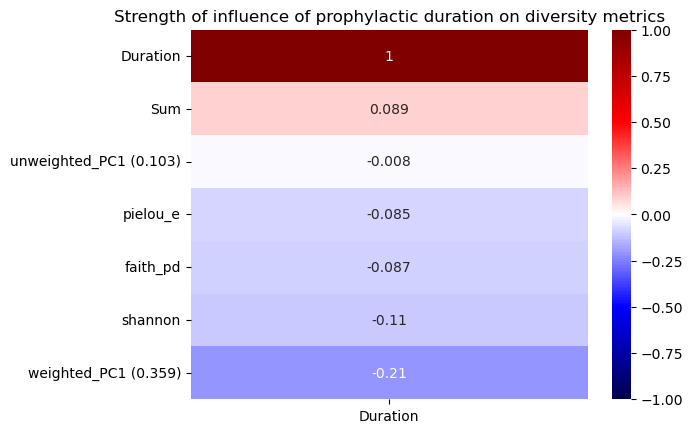

In [15]:
## Create a dataframe without the sample ID names
heatmap = inhibitory.drop(['#OTU ID', 'Concentration', 'SumGroup'], axis = 'columns')

## Create a heatmap of the strength of influence that duration has on diversity metrics
## Positive values indicate a positive influence, and negative values indicate an inverse association
sns.heatmap(heatmap.corr()[['Duration']].sort_values(by='Duration', ascending=False), vmin=-1, vmax=1, annot=True, cmap='seismic')

## Change the plot title
plt.title('Strength of influence of prophylactic duration on diversity metrics')